# 1-canyon run

## General description

$N_{shelf}\approx $  1.82, 1.59, 1.61 1/s, mean= 1.70 1/s

In [1]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(21.0, color=col, linestyle=':')
    ax.axvline(71.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P21|



### All readings 

Text(0.5,0,'time / s')

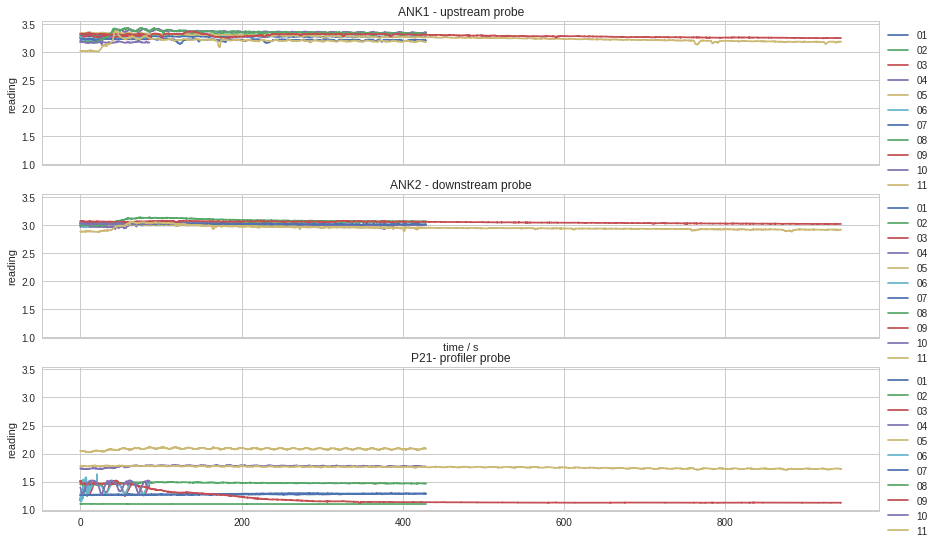

In [5]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ '01','02','03','04','05','06','07','08','09','10','11']

filepaths = ['../experiments/exp_19aug19/01_base.mat',
             '../experiments/exp_19aug19/02_base.mat',
             '../experiments/exp_19aug19/03_profile1.mat',
             '../experiments/exp_19aug19/04_experiment1.mat',
             '../experiments/exp_19aug19/05_recovery1.mat',
             '../experiments/exp_19aug19/06_profile2.mat',
             '../experiments/exp_19aug19/07_base.mat',
             '../experiments/exp_19aug19/08_experiment2.mat',
             '../experiments/exp_19aug19/09_recovery2.mat',
             '../experiments/exp_19aug19/10_profile3.mat',
             '../experiments/exp_19aug19/11_experiment3.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P21- profiler probe')

ax1.set_xlabel('time / s')

### Base readings

Text(0.5,0,'time / s')

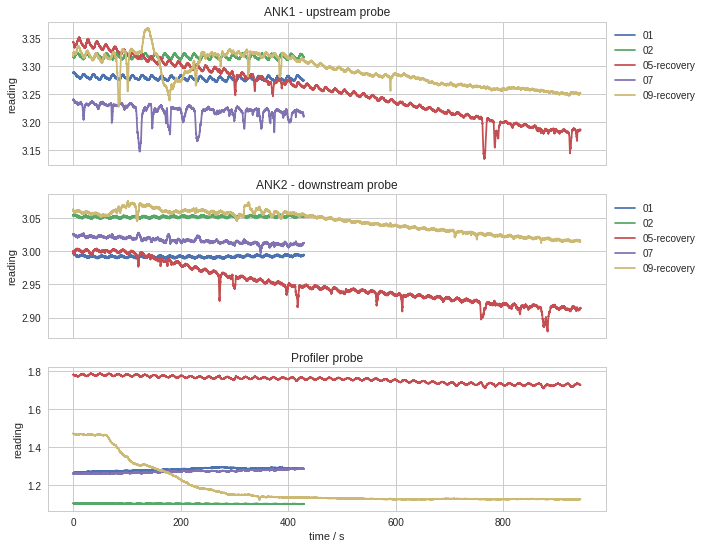

In [6]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(10,9), sharex=True)

labels = ['01','02','05-recovery','07','09-recovery']

filepaths = ['../experiments/exp_19aug19/01_base.mat',
             '../experiments/exp_19aug19/02_base.mat',
             '../experiments/exp_19aug19/05_recovery1.mat',
             '../experiments/exp_19aug19/07_base.mat',
             '../experiments/exp_19aug19/09_recovery2.mat',
             ]
sns.set_palette('plasma',n_colors=len(filepaths))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)
 
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('Profiler probe')
ax2.set_xlabel('time / s')

### Profiles

../experiments/exp_19aug19/03_profile1.mat
../experiments/exp_19aug19/06_profile2.mat
../experiments/exp_19aug19/10_profile3.mat


Text(0.5,1,'Probe P21')

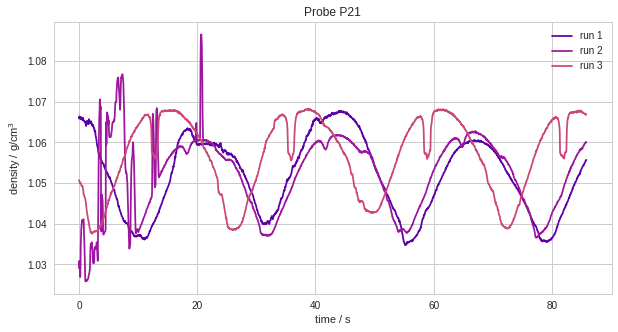

In [7]:
fig, ax0 = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = ['run 1', 'run 2', 'run 3']
files = ['../experiments/exp_19aug19/03_profile1.mat',
         '../experiments/exp_19aug19/06_profile2.mat',
         '../experiments/exp_19aug19/10_profile3.mat',
        ]

for filepath, lab in zip(files, labels):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = ctools.densP_17Aug19(mat['ch3'])
    time = mat['time']
    ax0.plot(time,P3,'-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g/cm$^3$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe P21')


### Experiment

../experiments/exp_19aug19/04_experiment1.mat
../experiments/exp_19aug19/08_experiment2.mat
../experiments/exp_19aug19/11_experiment3.mat


Text(0.5,0,'sample')

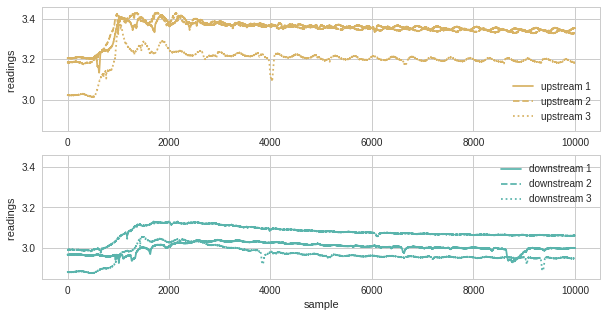

In [8]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],
          ['upstream 3', 'downstream 3'],['upstream 4', 'downstream 4']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':','-.']
files = ['../experiments/exp_19aug19/04_experiment1.mat',
         '../experiments/exp_19aug19/08_experiment2.mat',
         '../experiments/exp_19aug19/11_experiment3.mat',
        ]
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(P1,'-', label=lab[0], color=colors[0], linestyle=sty)
    ax1.plot(P2,'-', label=lab[1], color=colors[1], linestyle=sty)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax1.set_ylabel('readings ')
ax1.set_xlabel('sample')

../experiments/exp_19aug19/04_experiment1.mat
../experiments/exp_19aug19/08_experiment2.mat
../experiments/exp_19aug19/11_experiment3.mat


Text(0.5,1,'Probe density')

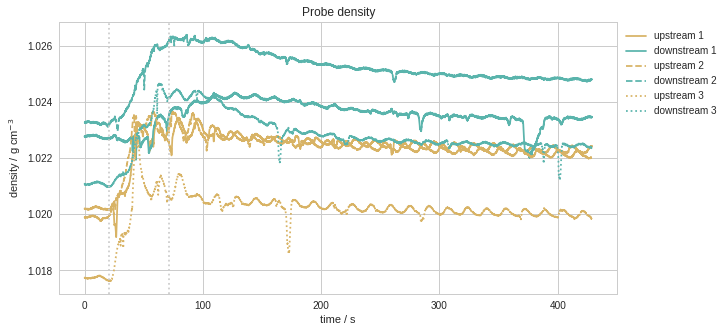

In [9]:
fig, ax0 = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],
          ['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':','-.']
files = ['../experiments/exp_19aug19/04_experiment1.mat',
         '../experiments/exp_19aug19/08_experiment2.mat',
         '../experiments/exp_19aug19/11_experiment3.mat',
        ]

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_17Aug19(P1),'-', label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_17Aug19(P2),'-', label=lab[1], color=colors[1], linestyle=sty)

plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


../experiments/exp_19aug19/04_experiment1.mat
../experiments/exp_19aug19/08_experiment2.mat
../experiments/exp_19aug19/11_experiment3.mat


Text(0.5,1,'Probe density minus initial density')

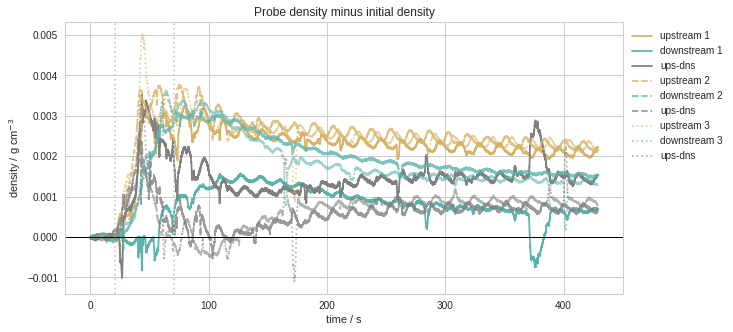

In [10]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],
          ['upstream 3', 'downstream 3'],['upstream 4', 'downstream 4']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':','-.']
alphas = [1,0.8,0.6,0.3]
files = ['../experiments/exp_19aug19/04_experiment1.mat',
         '../experiments/exp_19aug19/08_experiment2.mat',
         '../experiments/exp_19aug19/11_experiment3.mat',
         ]

for filepath, lab, sty, alpha in zip(files, labels, linestyles, alphas):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_17Aug19(P1)-ctools.densANK1_17Aug19(P1)[0],'-', 
             label=lab[0], color=colors[0], linestyle=sty, alpha=alpha)
    ax0.plot(time,ctools.densANK2_17Aug19(P2)-ctools.densANK2_17Aug19(P2)[0],'-', 
             label=lab[1], color=colors[1], linestyle=sty, alpha=alpha)
    ax0.plot(time,((ctools.densANK1_17Aug19(P1)-ctools.densANK1_17Aug19(P1)[0])-
                   (ctools.densANK2_17Aug19(P2)-ctools.densANK2_17Aug19(P2)[0])),
             '-', label='ups-dns',linestyle=sty, color='0.5', alpha=alpha)

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


../experiments/exp_19aug19/04_experiment1.mat
../experiments/exp_19aug19/08_experiment2.mat
../experiments/exp_19aug19/11_experiment3.mat


Text(0.5,1,'Probe density minus initial density')

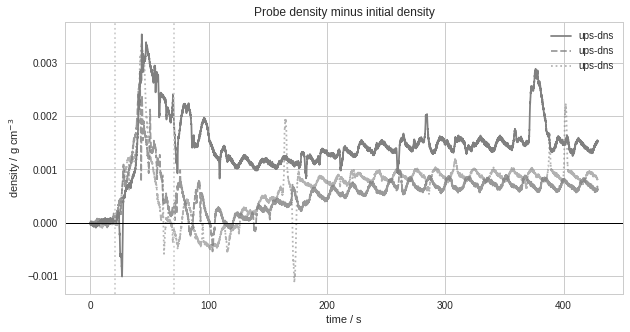

In [11]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],
          ['upstream 3', 'downstream 3'],['upstream 4', 'downstream 4']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':','-.']
alphas = [1,0.8,0.6,0.3]
files = ['../experiments/exp_19aug19/04_experiment1.mat',
         '../experiments/exp_19aug19/08_experiment2.mat',
         '../experiments/exp_19aug19/11_experiment3.mat',
         ]

for filepath, lab, sty, alpha in zip(files, labels, linestyles, alphas):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    #ax0.plot(time,ctools.densANK1_17Aug19(P1)-ctools.densANK1_17Aug19(P1)[0],'-', 
    #         label=lab[0], color=colors[0], linestyle=sty, alpha=alpha)
    #ax0.plot(time,ctools.densANK2_17Aug19(P2)-ctools.densANK2_17Aug19(P2)[0],'-', 
    #         label=lab[1], color=colors[1], linestyle=sty, alpha=alpha)
    ax0.plot(time,((ctools.densANK1_17Aug19(P1)-ctools.densANK1_17Aug19(P1)[0])-
                   (ctools.densANK2_17Aug19(P2)-ctools.densANK2_17Aug19(P2)[0])),
             '-', label='ups-dns',linestyle=sty, color='0.5', alpha=alpha)

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


In [12]:
g=9.81
rho_0=998.6

# N above sb run1
N1 = np.sqrt((g/rho_0)*((1025.59-1015.670))/0.0295)
print(N1)

1.8175382147867294


In [13]:
# N above sb run2
N2 = np.sqrt((g/rho_0)*(1025.77-1018.20)/0.0295)
print(N2)

1.5877263579391176


In [14]:
# N above sb run2
N3 = np.sqrt((g/rho_0)*(1025.14-1017.50)/0.029) 
print(N3)

1.6087420108293624


In [15]:
np.mean(np.array([N1,N2,N3]))

1.6713355278517366